In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1

Since we choose $\sigma=1$, the signal-to-noise ratio (SNR) is $\frac{\lambda_0}{\sigma^2}=\lambda_0$

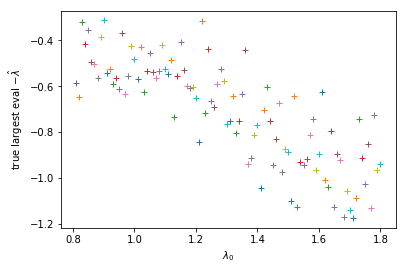

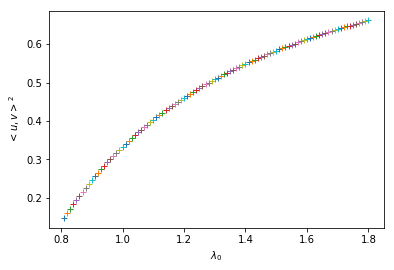

In [262]:
lambda0=0.8

for i in range(100):
    
    # Initialization
    lambda0 = lambda0 + 1/100
   
    gamma = 1/2
    n = int(400)  # number of samples
    p = int(n * gamma*gamma)  # dimension
    u = np.ones((p,1))/np.sqrt(p)  # np.linalg.norm(u) = 1

    sigma = lamda0 * np.dot(u,u.T) + np.identity(p)
    mean = np.zeros((p))


    #Sampling
    X = np.random.multivariate_normal(mean=mean, cov=sigma, size=n).T  # shape of X: (p,n)


    # Compute sample covariance matrix and its eigenvalues & eigenvectors
    cov_mat = np.dot(X,X.T)/n
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

    # Rearrange them in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # the index of eigenvalues in descending order

    desc_evals = eigenvalues[sorted_indices]  # eigenvalues in descending order
    desc_evecs = eigenvectors[:,sorted_indices]  # eigenvectors in descending order


    # Compute largest eigenvalue and its associated eigenvector using methods in (a) and (c)
    lamda_hat = (1+lambda0) * (1+gamma/lambda0)
    u_v_inner_prod=(1-gamma/(lambda0*lambda0)) / (1+gamma/lambda0)
    

    
    # plot
    
    # difference of true largest eigenvalue of computed eigenvalue
    plt.figure(1)
    plt.xlabel('$\lambda_0$')
    plt.ylabel('true largest eval $-\hat{\lambda}$')
    plt.plot(lambda0, desc_evals[0]-lamda_hat, marker = '+', linestyle = '')
    
    # inner product of u and v
    plt.figure(2)
    plt.xlabel('$\lambda_0$')
    plt.ylabel('$<u,v>^2$')
    plt.plot(lambda0, u_v_inner_prod, marker = '+', linestyle = '')
plt.show()

### Problem 2

In [143]:
import scipy.io
file = scipy.io.loadmat('snp452-data.mat')
file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'stock', 'X'])

In [145]:
print(file['X'])
print(file['X'].shape)

[[126.75  30.51  40.05 ...  25.12  40.3   40.64]
 [126.27  30.69  40.44 ...  24.55  40.4   40.27]
 [127.19  31.97  40.7  ...  24.99  40.66  41.39]
 ...
 [ 85.4   61.32  56.98 ...  37.96  66.41  46.32]
 [ 85.09  61.9   57.23 ...  38.54  66.45  46.14]
 [ 84.32  61.78  56.15 ...  38.27  66.15  46.69]]
(1258, 452)


In [227]:
# Stock data
X = file['X'].T

# Logarithmic prices
Y = np.log(X)

# Logarithmic price jumps
Y_jump = Y[:,1:1278] - Y[:,0:1257]

In [228]:
# Compute sample covariance matrix and its eigenvalues & eigenvectors
cov_matrix = np.dot(Y_jump, Y_jump.T)/Y_jump.shape[1]

eigenvalues_2, eigenvectors_2 = np.linalg.eig(cov_matrix)

# Rearrange them in descending order
sorted_indices_2 = np.argsort(eigenvalues_2)[::-1]  # the index of eigenvalues in descending order

desc_evals_2 = eigenvalues_2[sorted_indices_2]  # eigenvalues in descending order
desc_evecs_2 = eigenvectors_2[:,sorted_indices_2]  # eigenvectors in descending order


#### Parallel Analysis

In [258]:
R = int(50)
permuted_eigen_matrix = np.zeros((R,Y_jump.shape[0]))

for i in range(R):
    Y_jump_permuted = np.random.permutation(Y_jump.T).T # random permutation within each row of Y_jump
    cov_permuted = np.dot(Y_jump_permuted, Y_jump_permuted.T)/Y_jump_permuted.shape[1]
    
    eigenvalues_permuted, eigenvectors_permuted = np.linalg.eig(cov_permuted)

    sorted_indices_permuted = np.argsort(eigenvalues_permuted)[::-1]  # the index of eigenvalues in descending order

    desc_evals_permuted = eigenvalues_permuted[sorted_indices_permuted]  # eigenvalues in descending order
    desc_evecs_permuted = eigenvectors_permuted[:,sorted_indices_permuted]  # eigenvectors in descending order
    permuted_eigen_matrix[i,:]=desc_evals_permuted
    
permuted_eigen_matrix

array([[3.83452400e-02, 8.92081483e-03, 7.59199409e-03, ...,
        1.46588235e-05, 1.32870875e-05, 1.17506867e-05],
       [3.83452400e-02, 8.92081483e-03, 7.59199409e-03, ...,
        1.46588235e-05, 1.32870875e-05, 1.17506867e-05],
       [3.83452400e-02, 8.92081483e-03, 7.59199409e-03, ...,
        1.46588235e-05, 1.32870875e-05, 1.17506867e-05],
       ...,
       [3.83452400e-02, 8.92081483e-03, 7.59199409e-03, ...,
        1.46588235e-05, 1.32870875e-05, 1.17506867e-05],
       [3.83452400e-02, 8.92081483e-03, 7.59199409e-03, ...,
        1.46588235e-05, 1.32870875e-05, 1.17506867e-05],
       [3.83452400e-02, 8.92081483e-03, 7.59199409e-03, ...,
        1.46588235e-05, 1.32870875e-05, 1.17506867e-05]])

In [259]:
eigen_compare_index = (permuted_eigen_matrix>eigen_matrix)
pval = np.sum(eigen_compare_index, axis=0)/R
print(pval)

[0.04 0.26 0.32 0.04 0.1  0.46 0.92 0.36 0.6  0.28 0.08 0.88 0.48 0.62
 0.56 0.1  0.4  0.18 0.3  0.1  0.66 0.02 0.02 0.5  0.54 0.64 0.12 0.72
 0.58 0.24 0.78 0.38 0.82 0.92 0.26 0.52 0.1  0.22 0.9  0.86 0.48 0.8
 0.18 0.32 0.14 0.72 0.4  0.52 0.54 0.16 0.24 0.5  0.52 0.74 0.42 0.88
 0.78 0.54 1.   0.2  0.82 0.5  0.24 0.4  0.98 0.8  0.1  0.32 0.46 0.24
 0.54 0.46 0.56 0.44 0.88 0.34 0.32 0.62 0.7  0.28 0.44 0.36 0.68 0.08
 0.02 0.02 0.86 0.02 0.04 0.28 0.   0.5  0.04 0.02 0.1  0.2  0.56 0.46
 0.96 0.76 0.14 0.32 0.08 0.84 0.   0.04 0.18 0.32 0.56 0.62 0.4  0.68
 0.2  0.3  0.24 0.22 0.1  0.8  0.1  1.   0.18 0.78 0.08 0.92 0.8  0.38
 0.74 0.28 0.18 0.4  0.84 0.02 0.6  0.54 0.34 0.08 0.34 0.72 0.22 0.18
 0.02 0.54 0.44 0.58 0.24 0.46 0.34 0.88 0.34 0.66 0.72 0.46 0.28 0.84
 0.3  0.16 0.16 0.24 0.   0.14 0.54 0.58 0.64 0.76 0.8  0.   0.46 0.28
 0.88 0.52 0.08 0.94 0.92 0.92 0.82 0.62 0.84 0.78 0.88 0.7  0.84 0.84
 0.66 0.9  0.02 0.18 0.78 0.28 1.   0.24 0.4  0.72 0.88 0.94 0.64 0.42
 0.58 1

In [260]:
pval_compare_index = (pval < 0.05)
print('the sumber of true signal is:',np.sum(pval_compare_index))

the sumber of true signal is: 39


In [261]:
true_signal = desc_evals_2[pval_compare_index]
print('the true signals are:', '\n', true_signal)

the true signals are: 
 [3.83452400e-02 5.04734993e-03 1.50075443e-03 1.46995083e-03
 6.83403300e-04 6.78292584e-04 6.62521474e-04 6.59970347e-04
 6.50502675e-04 6.43255410e-04 6.34733523e-04 5.88675653e-04
 5.83140744e-04 4.89802042e-04 4.58452805e-04 4.01588576e-04
 3.85391232e-04 3.20493623e-04 2.64854213e-04 2.22409190e-04
 2.06781760e-04 1.93629249e-04 1.85225330e-04 1.77227740e-04
 1.50363174e-04 1.43447040e-04 1.35173729e-04 1.21951035e-04
 9.23171227e-05 8.21504804e-05 7.98192044e-05 5.75033187e-05
 4.92296049e-05 4.69348075e-05 4.17185562e-05 3.72145652e-05
 3.05078917e-05 2.71081586e-05 2.49389930e-05]
